In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(
    'leetcode_dataset.csv')

<Axes: xlabel='difficulty'>

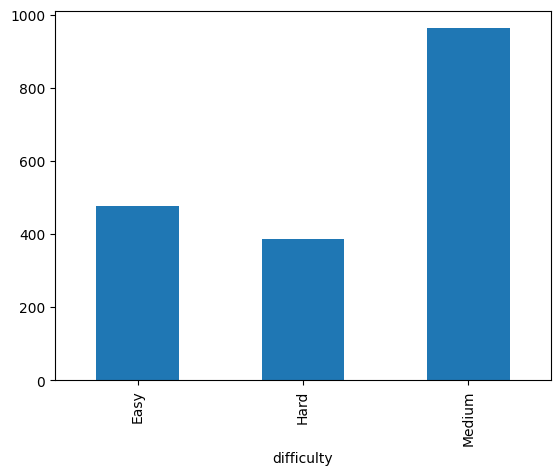

In [5]:
df.groupby('difficulty').size().plot(kind='bar')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1825 non-null   int64  
 1   title              1825 non-null   object 
 2   description        1825 non-null   object 
 3   is_premium         1825 non-null   int64  
 4   difficulty         1825 non-null   object 
 5   solution_link      987 non-null    object 
 6   acceptance_rate    1825 non-null   float64
 7   frequency          1825 non-null   float64
 8   url                1825 non-null   object 
 9   discuss_count      1825 non-null   int64  
 10  accepted           1825 non-null   object 
 11  submissions        1825 non-null   object 
 12  companies          1749 non-null   object 
 13  related_topics     1571 non-null   object 
 14  likes              1825 non-null   int64  
 15  dislikes           1825 non-null   int64  
 16  rating             1825 

In [8]:
df['description'] = df['description'].str.replace('\n', ' ')

In [10]:
df['description'][0]

'Given an array of integers `nums` and an integer `target`, return indices of the two numbers such that they add up to `target`.  You may assume that each input would have exactly one solution, and you may not use the same element twice.  You can return the answer in any order.   Example 1: Input: nums = [2,7,11,15], target = 9 Output: [0,1] Output: Because nums[0] + nums[1] == 9, we return [0, 1].  Example 2: Input: nums = [3,2,4], target = 6 Output: [1,2]  Example 3: Input: nums = [3,3], target = 6 Output: [0,1]  Constraints: `2 <= nums.length <= 103` `-109 <= nums[i] <= 109` `-109 <= target <= 109` Only one valid answer exists.'

In [12]:
df.columns

Index(['id', 'title', 'description', 'is_premium', 'difficulty',
       'solution_link', 'acceptance_rate', 'frequency', 'url', 'discuss_count',
       'accepted', 'submissions', 'companies', 'related_topics', 'likes',
       'dislikes', 'rating', 'asked_by_faang', 'similar_questions'],
      dtype='object')

/var/folders/ny/1k1kh8y91971mf_whtbc22pm0000gn/T/ipykernel_9587/2960281035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.values, y=topic_counts.index, palette='viridis')


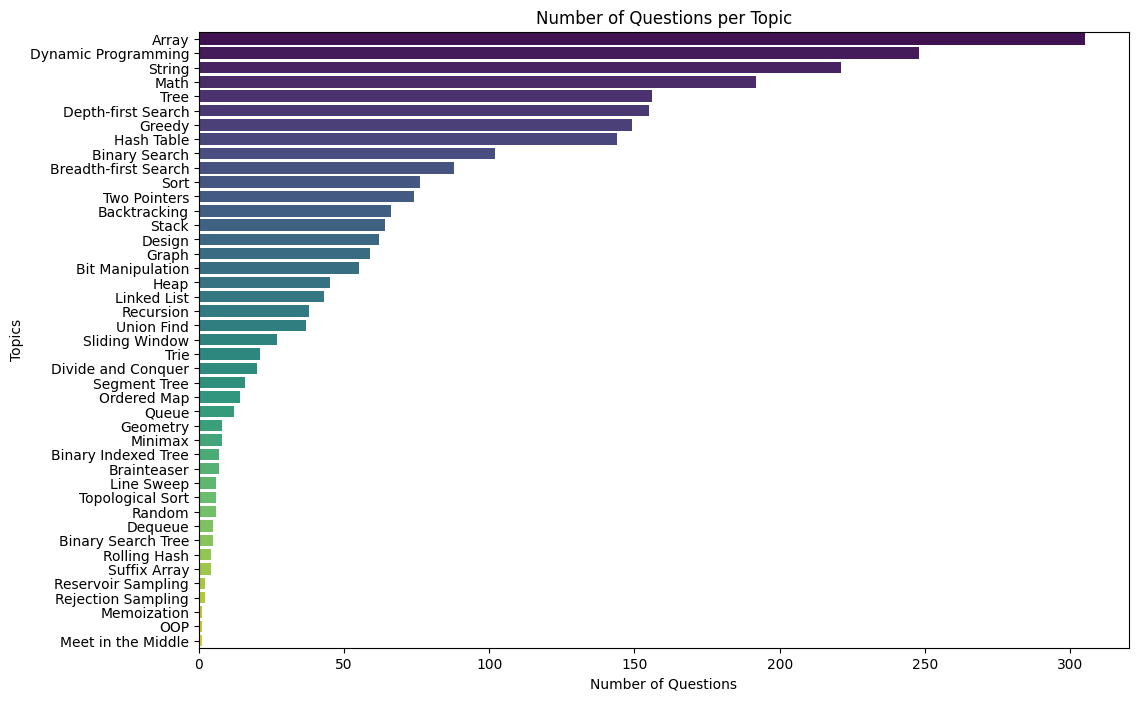

In [14]:
# Extract topics from the 'related_topics' column
df['topics'] = df['related_topics'].apply(lambda x: [topic.strip() for topic in x.split(',')] if pd.notnull(x) else [])

# Explode the dataframe to have one topic per row
df_exploded = df.explode('topics')

# Group by topics and count the number of questions for each topic
topic_counts = df_exploded['topics'].value_counts()

# Plot the topic counts
plt.figure(figsize=(12, 8))
sns.barplot(x=topic_counts.values, y=topic_counts.index, palette='viridis')
plt.title('Number of Questions per Topic')
plt.xlabel('Number of Questions')
plt.ylabel('Topics')
plt.show()

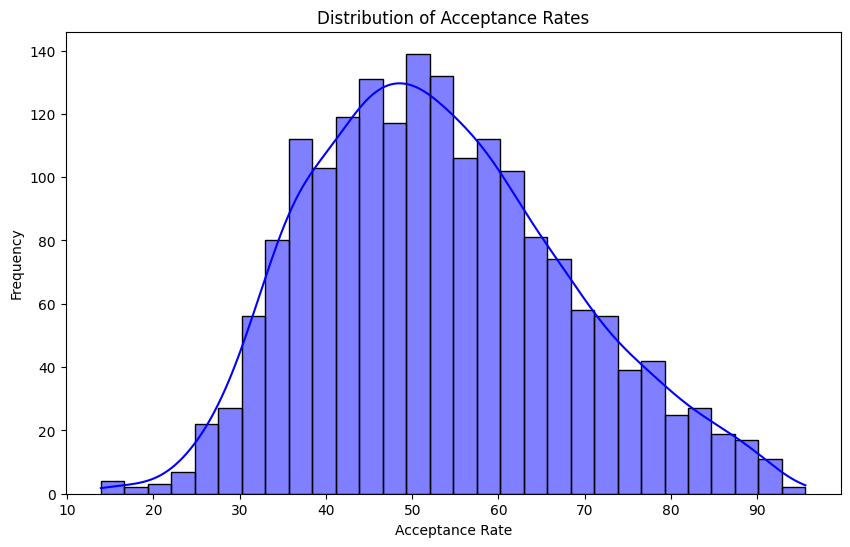

In [17]:
# Plotting the distribution of acceptance rates
plt.figure(figsize=(10, 6))
sns.histplot(df['acceptance_rate'], bins=30, kde=True, color='blue')
plt.title('Distribution of Acceptance Rates')
plt.xlabel('Acceptance Rate')
plt.ylabel('Frequency')
plt.show()

/var/folders/ny/1k1kh8y91971mf_whtbc22pm0000gn/T/ipykernel_9587/3747214015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='difficulty', palette='viridis')


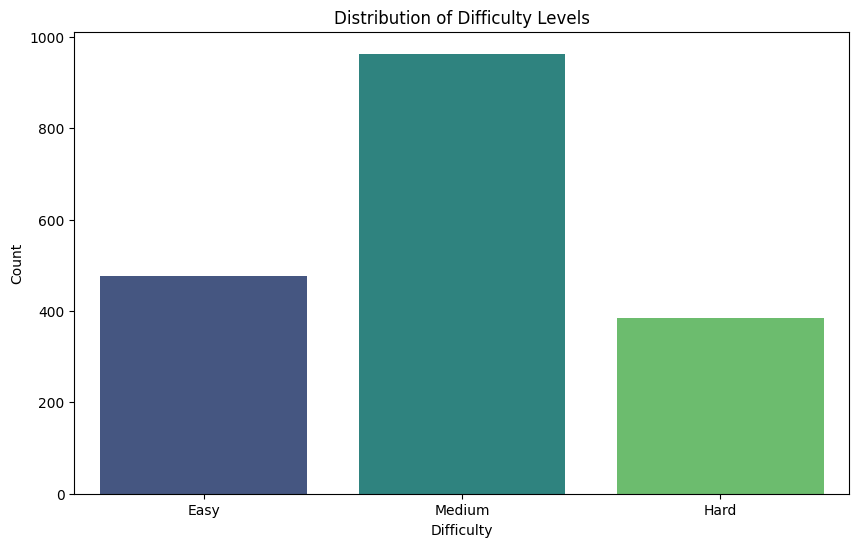

In [18]:
# Plotting the distribution of difficulty levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='difficulty', palette='viridis')
plt.title('Distribution of Difficulty Levels')
plt.xlabel('Difficulty')
plt.ylabel('Count')
plt.show()

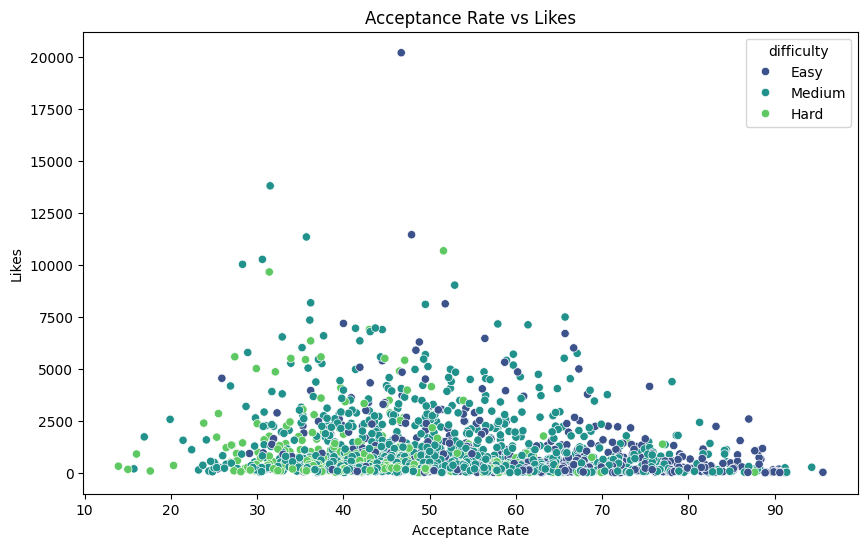

In [19]:
# Plotting the relationship between acceptance rate and likes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='acceptance_rate', y='likes',
                hue='difficulty', palette='viridis')
plt.title('Acceptance Rate vs Likes')
plt.xlabel('Acceptance Rate')
plt.ylabel('Likes')
plt.show()

In [7]:
df[['description', 'title', 'difficulty', 'solution_link', 'url', 'related_topics', 'companies', 'similar_questions']].head(1)

,description,title,difficulty,solution_link,url,related_topics,companies,similar_questions
0,Given an array of integers `nums` and an integ...,Two Sum,Easy,/articles/two-sum,https://leetcode.com/problems/two-sum,"Array,Hash Table","Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","[3Sum, /problems/3sum/, Medium], [4Sum, /probl..."


In [8]:
df['description'][0]

'Given an array of integers `nums` and an integer `target`, return indices of the two numbers such that they add up to `target`.\n\nYou may assume that each input would have exactly one solution, and you may not use the same element twice.\n\nYou can return the answer in any order.\n\n\nExample 1:\nInput: nums = [2,7,11,15], target = 9\nOutput: [0,1]\nOutput: Because nums[0] + nums[1] == 9, we return [0, 1].\n\nExample 2:\nInput: nums = [3,2,4], target = 6\nOutput: [1,2]\n\nExample 3:\nInput: nums = [3,3], target = 6\nOutput: [0,1]\n\nConstraints:\n`2 <= nums.length <= 103`\n`-109 <= nums[i] <= 109`\n`-109 <= target <= 109`\nOnly one valid answer exists.'